<a href="https://colab.research.google.com/github/kyle-cech/Homework_6/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import copy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename) #open url
df = xr.open_dataset(savename) # get data from url
temp = df['air'] #get air temperatures, temp, from df

In [2]:
#Step 1
ta = temp.sel(time = slice('1990-01-01', '2020-12-31')) #get data from 1990-2020
unweighted_mean = ta.groupby('time.year').mean() #find mean of all temperatures w/ no weighting
weighted = copy.copy(ta) #created copy of 1990-2020 data
#Code adapted from: https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html
weights = np.cos(np.deg2rad(ta.lat)) #calculate weights for latitude
weights.name = "weights"
ta_weighted = unweighted_mean.weighted(weights) #add weighted latitudes to data
weighted_mean = ta_weighted.mean(["lon", "lat"]) - 273.15 #calculate mean for each year and convert from K to C

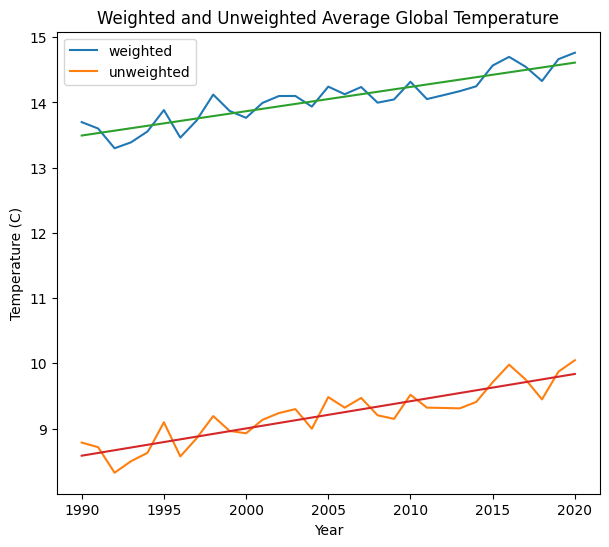

In [3]:
#Step 2
x = weighted_mean['year'] #x is all years
y = weighted_mean #y is weighted means
y1 = (unweighted_mean.mean(['lon', 'lat']) - 273.15) #y1 is unweighted means
m, b = np.polyfit(x, y, 1) #create linear regression line for weighted data
m1, b1 = np.polyfit(x, y1, 1) #create linear regression line for unweighted data
plt.subplots(figsize = (7, 6)) #create plot figure
plt.plot(weighted_mean['year'], weighted_mean, label = 'weighted') #plot weighted data
plt.plot(weighted_mean['year'], y1, label = 'unweighted') #plot unweighted data
plt.plot(x, m * x + b)
plt.plot(x, m1 * x + b1) #plot regression lines
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('Weighted and Unweighted Average Global Temperature')
plt.legend()

Text(0.5, 1.0, 'Weighted Average US Temperature From 2005-2020 (C)')

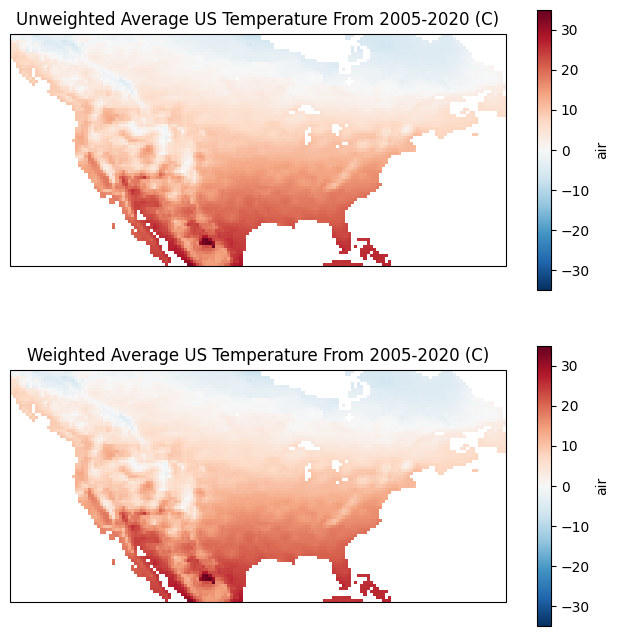

In [8]:
us_15 = ta.sel(time = slice('2005-01-01', '2020-12-31'))[:, 60:135, 450:610] #get US data of 15 years, 2005-2020
unweighted_15_us_avg = us_15.mean(dim='time') - 273.15 #find unweighted 15-year average
us_15_weighted = us_15.weighted(weights) #apply weights to lat from 2005-2020 data
weighted_15_us_avg = us_15_weighted.mean(dim='time') - 273.15 #find weighted average

fig, ax = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.Robinson()), figsize=(8,8)) #create subplots with Robinson Projection
unweighted_15_us_avg.plot(ax = ax[0]) #Plot unweighted data on top
weighted_15_us_avg.plot(ax = ax[1]) #Plot weighted data on bottom
ax[0].set_title('Unweighted Average US Temperature From 2005-2020 (C)')
ax[1].set_title('Weighted Average US Temperature From 2005-2020 (C)')